In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image 

In [2]:
#Loading the data 

data = os.listdir(r'/kaggle/input/digits/digits updated/digits updated' )
data_X = []     
data_y = []  
data_classes = len(data)
for i in range (0,data_classes):
    data_list = os.listdir(r"/kaggle/input/digits/digits updated/digits updated" +"/"+str(i))
    for j in data_list:
        pic = cv2.imread(r"/kaggle/input/digits/digits updated/digits updated" +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(32,32))
        data_X.append(pic)
        data_y.append(i)

         
if len(data_X) == len(data_y) :
    print("Total Dataponits = ",len(data_X))

# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)

Total Dataponits =  10160


In [3]:
#Spliting the train validation and test sets

train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)


In [4]:
def Prep(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #making image grayscale
    img = cv2.equalizeHist(img) 
    x,img=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img = img/255
    return img

train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))

#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

#Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [5]:
# One hot encoding of the labels

train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Input(shape=(32, 32, 1))) 
model.add((Conv2D(60,(5,5) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 30)     │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       960,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,081,490 (4.13 MB)

 Trainable params: 1,081,490 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

history = model.fit(
    datagen.flow(train_X, train_y, batch_size=32), 
    epochs=50, 
    validation_data=(valid_X, valid_y), 
    verbose=2, 
    steps_per_epoch=len(train_X) // 32,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733418284.060287      66 service.cc:145] XLA service 0x7e4134009f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733418284.060369      66 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1733418288.610850      66 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


241/241 - 12s - 51ms/step - accuracy: 0.7199 - loss: 0.8257 - val_accuracy: 0.9705 - val_loss: 0.0936
Epoch 2/50
241/241 - 0s - 823us/step - accuracy: 0.9375 - loss: 0.1750 - val_accuracy: 0.9720 - val_loss: 0.0867
Epoch 3/50


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


241/241 - 3s - 12ms/step - accuracy: 0.9270 - loss: 0.2357 - val_accuracy: 0.9824 - val_loss: 0.0475
Epoch 4/50
241/241 - 0s - 829us/step - accuracy: 1.0000 - loss: 0.0229 - val_accuracy: 0.9829 - val_loss: 0.0446
Epoch 5/50
241/241 - 3s - 12ms/step - accuracy: 0.9465 - loss: 0.1770 - val_accuracy: 0.9855 - val_loss: 0.0436
Epoch 6/50
241/241 - 0s - 800us/step - accuracy: 0.9062 - loss: 0.2082 - val_accuracy: 0.9871 - val_loss: 0.0424
Epoch 7/50
241/241 - 3s - 12ms/step - accuracy: 0.9572 - loss: 0.1379 - val_accuracy: 0.9912 - val_loss: 0.0298
Epoch 8/50
241/241 - 0s - 826us/step - accuracy: 1.0000 - loss: 0.0202 - val_accuracy: 0.9896 - val_loss: 0.0293
Epoch 9/50
241/241 - 3s - 13ms/step - accuracy: 0.9607 - loss: 0.1303 - val_accuracy: 0.9871 - val_loss: 0.0413
Epoch 10/50
241/241 - 0s - 644us/step - accuracy: 0.9688 - loss: 0.0848 - val_accuracy: 0.9912 - val_loss: 0.0364
Epoch 11/50
241/241 - 3s - 12ms/step - accuracy: 0.9657 - loss: 0.1106 - val_accuracy: 0.9917 - val_loss: 0.02

In [8]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.008392447605729103
Test Accuracy = 0.998031497001648


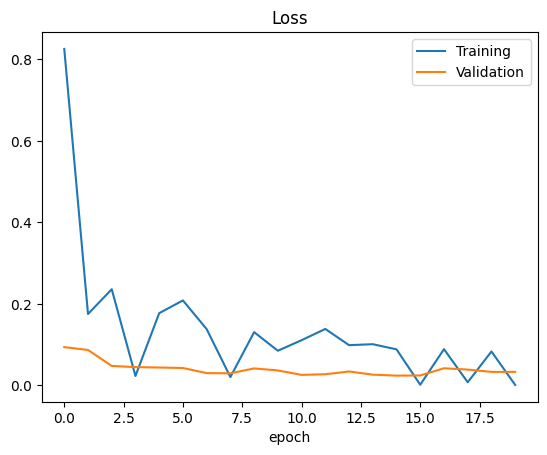

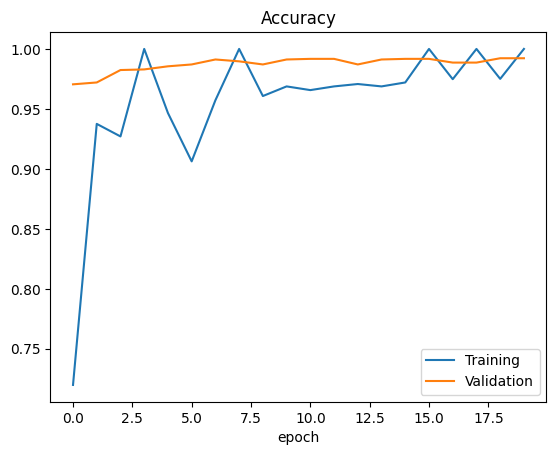

In [9]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


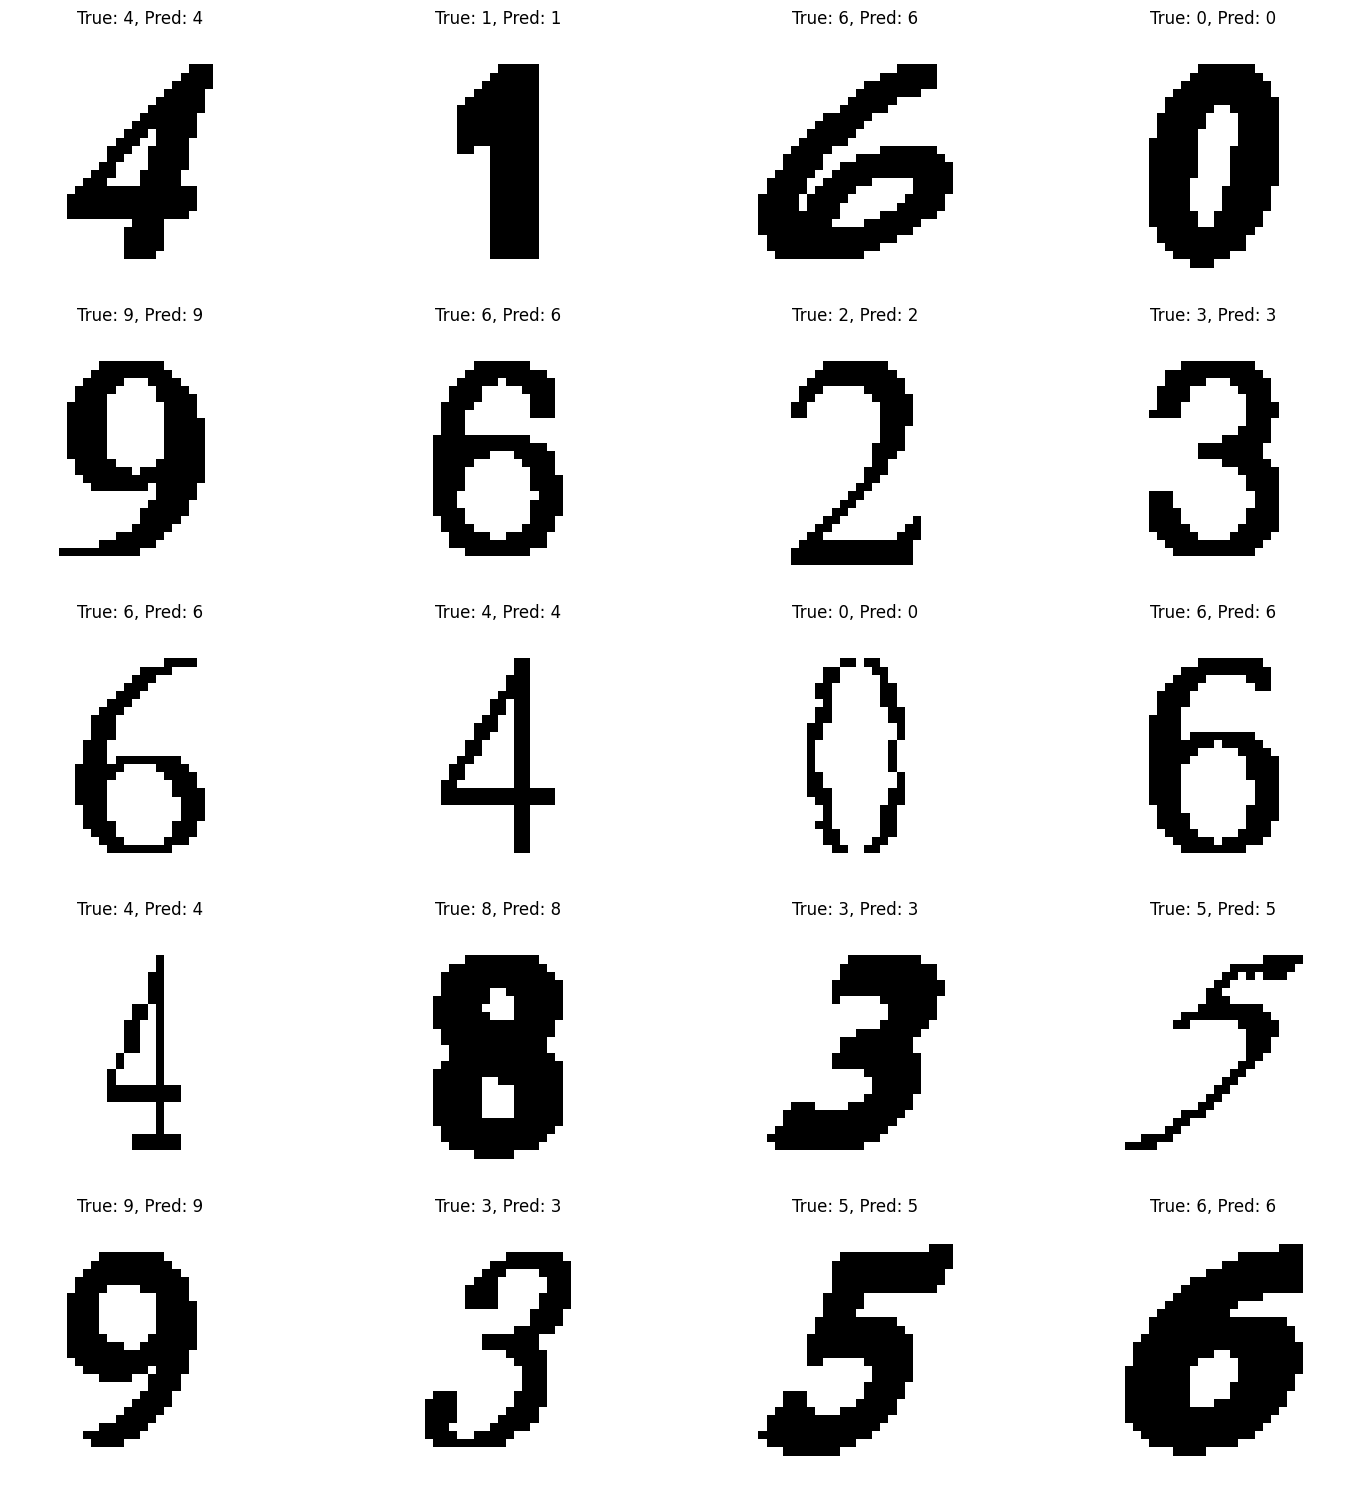

In [10]:
predictions = model.predict(test_X)

random_indices = np.random.choice(test_X.shape[0], 20, replace=False)
fig, axs = plt.subplots(5, 4, figsize=(15, 15))

axs = axs.flatten()
for i, idx in enumerate(random_indices):
    ax = axs[i]
  
    true_label = test_y[idx]
    predicted_label = np.argmax(predictions[idx])

    ax.imshow(test_X[idx].reshape(32,32), cmap='gray')
    ax.set_title(f"True: {np.argmax(true_label)}, Pred: {predicted_label}")
    ax.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()


In [11]:
true_labels = np.argmax(test_y, axis=1)  
predicted_labels = np.argmax(predictions, axis=1) 
report = classification_report(true_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        58
           2       0.98      1.00      0.99        54
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        57
           7       1.00      0.98      0.99        43
           8       1.00      1.00      1.00        42
           9       1.00      1.00      1.00        53

    accuracy                           1.00       508
   macro avg       1.00      1.00      1.00       508
weighted avg       1.00      1.00      1.00       508

